# Smith Kaart Oefening 2

In [2]:
from cursusdef import *

## Opgave

Hoe gebruik je een Smith kaart om een antenne van 80 Ohm aan te passen aan een coax van 50 Ohm voor een frequentie van 300 MHz ($\lambda$= 50 cm)?

### Oplossing 1: Bijplaatsen van een capaciteit in serie

We plaatsen $z= \frac{Z_L}{Z_0}=1.6$ op de Smith kaart (rode dotje) en we zoeken waar we de r=1 cirkel snijden in het bovenste deel van de Smith kaart (groene dotje).

###### Smith kaart van de eerste oplossing.

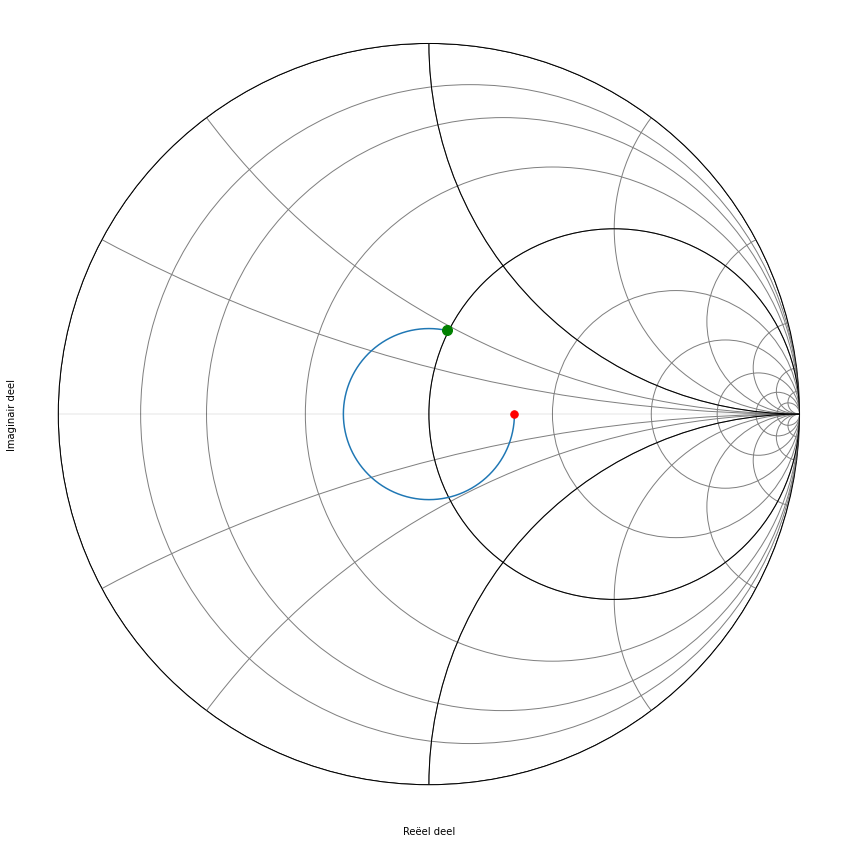

In [12]:
Z_L = 80
Z_0 = 50
f_0_str = '300MHz'
freq = rf.Frequency(start=200, stop=400, npoints=31, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(283)]
def smitplot(zlijn,Z_0,tt='z'):
    gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, chart_type=tt, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
smitplot(zlijn,Z_0)

Als we van de aanpassing (groene dot) naar de belasting gaan (rode dot), draaien we in tegenwijzerzin over een afstand van $283^o$. Dit geeft een afstand van $\frac{283}{360}\frac{\lambda}{2}$=0.393 $\lambda$ = 19.65cm.    ($\lambda$= 50 cm is gegeven)

De nieuwe z = 1 + j 0.47. Daaruit volgt dat Z = 50 Ohm + j 23.68 Ohm (zie Table 1). Het complexe deel van deze impedantie kunnen we compenseren door een condensator met impedantie van ongeveer - j 23.68 Ohm  toe te voegen. Als we het helemaal juist willen hebben kunnen we in de array van de lijnimpedantie (zie Table 1) juist gaan kijken waar het reele deel 50 Ohm wordt en wat we dan als complex deel over houden.

$$ \frac{1}{j \omega C}= - j 23.68 \Omega$$

Als we vervolgens $\omega$ invullen, wetende dat de freqentie f=300 MHz:

$$ \omega= 2 \pi \cdot  300\times 10^6 $$

$$ C= 22.4 pF  $$

In [ ]:
283/360/2*50

In [ ]:
1/23.68/3e8/2/np.pi

In [6]:
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[(i,line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(280,285)]
def zlijnprint(zlijn,golflengte=50):
    print('hoek    impedantie (Ohm)     lengte coax (cm)')
    for i,zi in zlijn:
        print('{:4}  Z= {:.2f}{:+.2f}j Ohm     lengte={:.2f} cm'.format(i,zi.real,zi.imag, i/360*golflengte/2))
zlijnprint(zlijn)

hoek    impedantie (Ohm)     lengte coax (cm)
 280  Z= 48.65+23.35j Ohm     lengte=19.44 cm
 281  Z= 49.04+23.47j Ohm     lengte=19.51 cm
 282  Z= 49.45+23.58j Ohm     lengte=19.58 cm
 283  Z= 49.86+23.68j Ohm     lengte=19.65 cm
 284  Z= 50.27+23.78j Ohm     lengte=19.72 cm


<p class=tabcaption> Overzicht van de bekomen impedantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
De optimale condensatorwaarde in serie wordt dus  22.4 pF en de nodige lengte van de coax tussen de antenne en de aanpassing is 19.65 cm
</p>

Het schema dat we nodig hebben om deze eerst oplossing te realiseren wordt dus:

###### circuit van de eerste oplossing

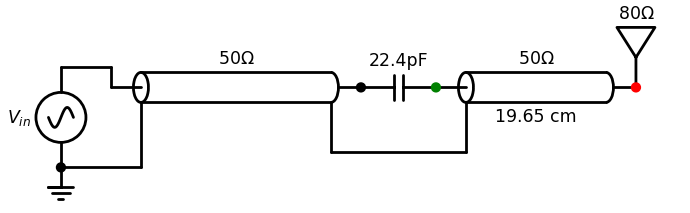

In [3]:
with schemdraw.Drawing() as d:
    d += Ground()
    d += Dot()
    d += (bron := SourceSin(l=2.0,d='up', label='$V_{in}$'))
    d += Line(l=1,d='right')
    d += Line(l=0.4,d='down')
    d += (coax1 := Coax(d='right',length=5, label='$50\Omega$'))
    d += Dot()
    d += Capacitor(l=1.5, label='22.4pF')
    d += Dot(color='g')
    d += (coax2 := Coax(l=1.5,length=4, label='$50\Omega$', botlabel='19.65 cm'))
    d += Dot(color='r')
    d += Antenna( label='$80\Omega$')
    d += Line(xy=coax1.shieldend,l=1,d='down')
    d += Line(tox=coax2.shieldstart,d='right')
    d += Line(toy=coax2.shieldstart,d='up')
    d += Line(xy=bron.start,tox=coax1.shieldstart,d='right')
    d += Line(toy=coax1.shieldstart,d='up')

### Oplossing 2: Bijplaatsen van een inductantie in serie

We plaatsen $\frac{Z_L}{Z_0}=1.6$ op de Smith kaart en we zoeken waar we de r=1 cirkel snijden in het onderste deel van de kaart.

###### Smith kaart van de tweede oplossing

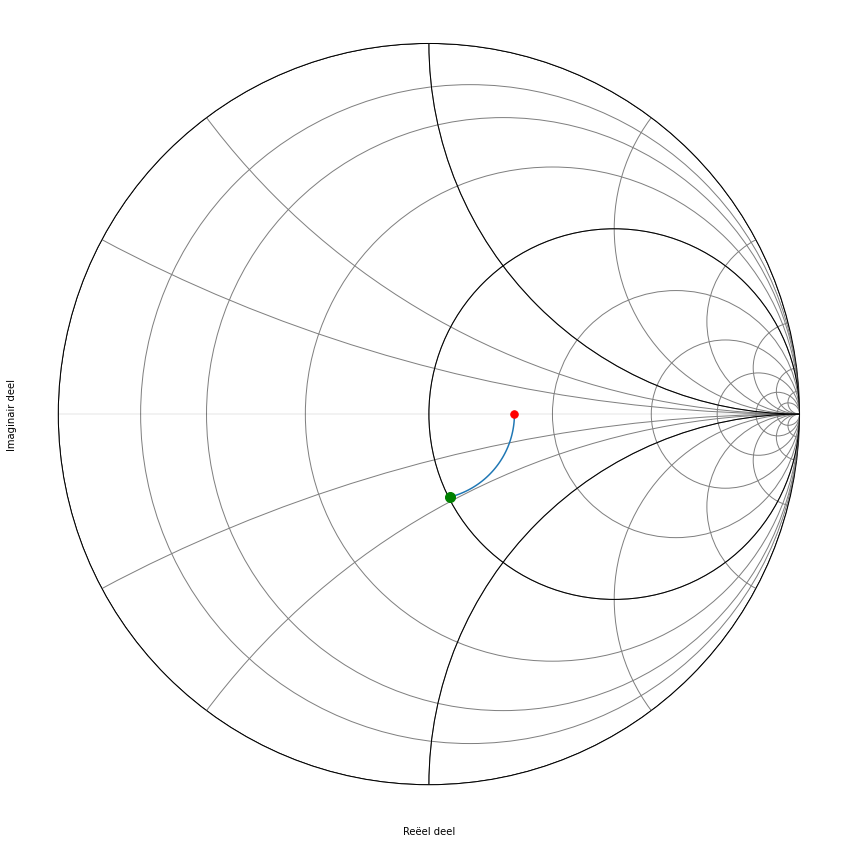

In [13]:
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(77)]
smitplot(zlijn,Z_0)

We zoomen vervolgens in op het deel van de cirkel die de eenheidscirkel snijdt.

In [14]:
zlijn=[(i,line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(75,80)]
zlijnprint(zlijn,golflengte=50)

hoek    impedantie (Ohm)     lengte coax (cm)
  75  Z= 50.69-23.87j Ohm     lengte=5.21 cm
  76  Z= 50.27-23.78j Ohm     lengte=5.28 cm
  77  Z= 49.86-23.68j Ohm     lengte=5.35 cm
  78  Z= 49.45-23.58j Ohm     lengte=5.42 cm
  79  Z= 49.04-23.47j Ohm     lengte=5.49 cm


<p class=tabcaption> Overzicht van de bekomen impedantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

De nieuwe z = 1 - j 0.47. Daaruit volgt dat Z = 50 Ohm - j 23.68 Ohm. Het complexe deel van deze impedantie kunnen we compenseren door een spoel met impedantie van ongeveer  j 23.68 Ohm  toe te voegen. Als we het helemaal juist willen hebben kunnen we in de array van zlijn juist gaan kijken waar het reele deel 50 Ohm wordt en wat we dan als complex deel over houden.

$$ j \omega L=  j 23.68 \Omega$$

$$ \omega= 2 \pi \cdot 300 \times 10^6 $$

$$ L=12.56 nH $$

In [ ]:
23.68/2/np.pi/3e8

Het schema dat we nodig hebben om deze tweede oplossing te realiseren wordt dus:

###### circuit van de tweede oplossing.

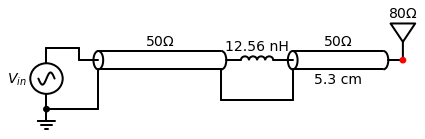

In [16]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$50\Omega$'))

d.add(elm.Inductor(l=1, label='12.56 nH'))

coax2=d.add(elm.coax(l=1.5,length=4, label='$50\Omega$', botlabel='5.3 cm'))
d.add(elm.Dot, color='r')
d.add(elm.Antenna( label='$80\Omega$'))
d.add(elm.Line(xy=coax1.shieldend,l=1,d='down'))
d.add(elm.Line(tox=coax2.shieldstart,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart,d='up') )     

d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()

<p class="alert alert-success">
De optimale inductantiewaarde in serie wordt dus  12.56 nH en de nodige lengte van de coax tussen de antenne en de aanpassing is 5.3 cm
</p>

### Oplossing 3: Bijplaatsen van een capaciteit in parallel

We plaatsen $\frac{Z_L}{Z_0}=1.6$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

###### Smith kaart van de derde oplossing.

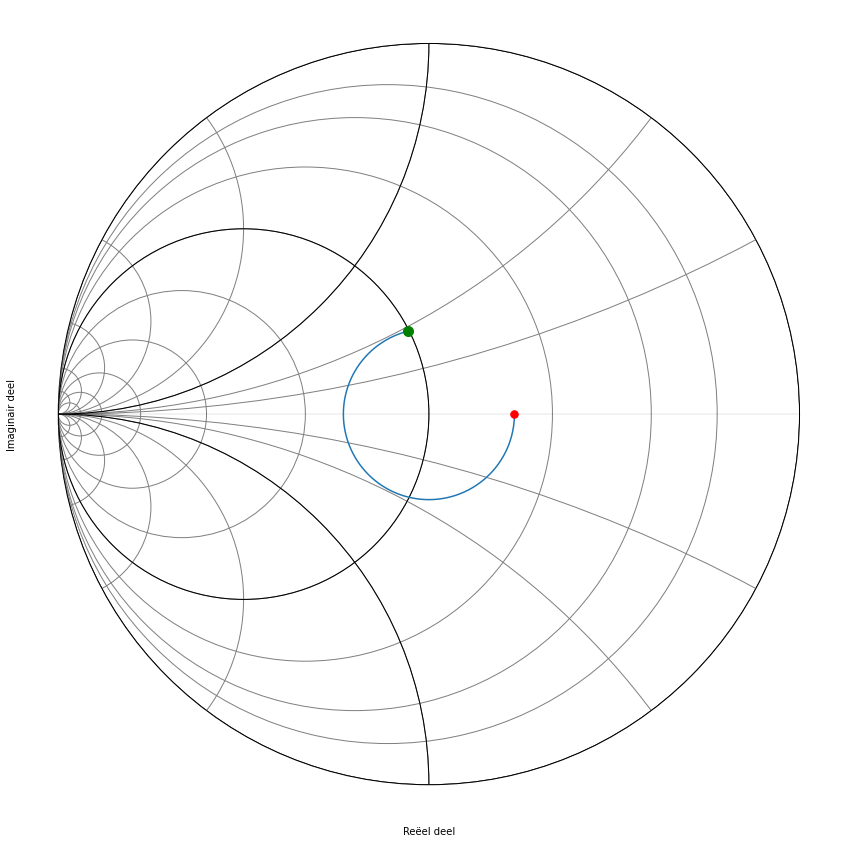

In [18]:
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,257)]
smitplot(zlijn,Z_0,tt='y')

Omdat een Smith kaart in admitantie het spiegelbeeld is van een Smith kaart in impedentie, kunnen we ook de kaart spiegelen. We moeten dan wel aan de andere kant van de kaart vertrekken. Dit is weergegeven in figuur 6.

###### Smith kaart van de derde oplossing als admittantie.

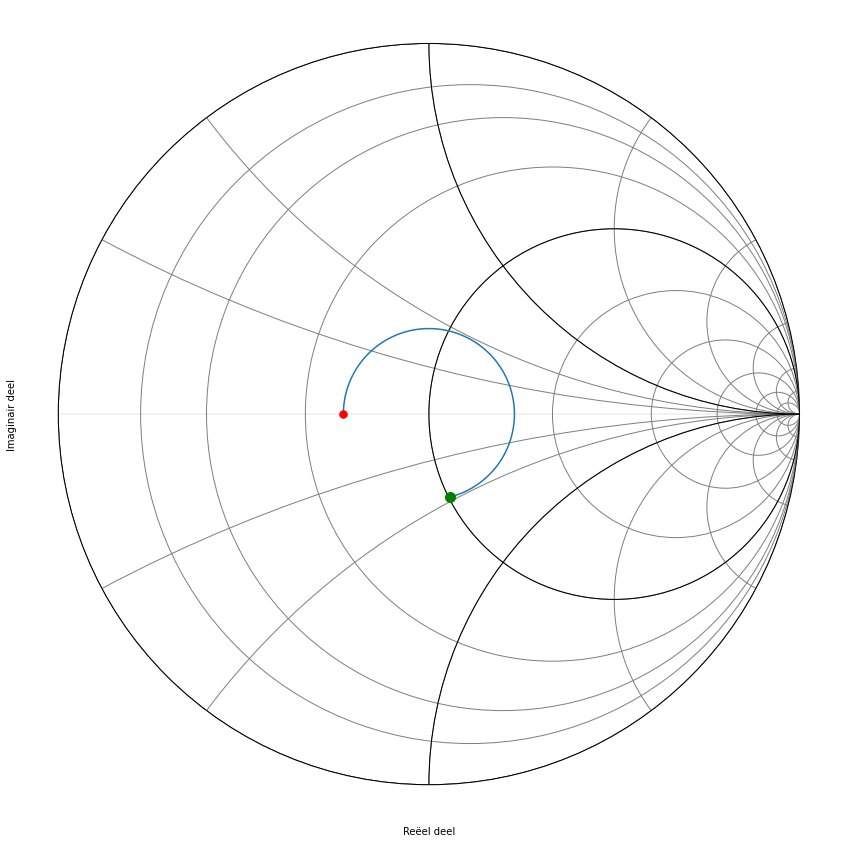

In [19]:
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,257)]
smitplot(ylijn,Y_0)

In [21]:
Y_0=1/Z_0
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(255,260)]
def ylijnprint(ylijn,golflengte=50):
    print('hoek    admitantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}    Y= {:-.2f}{:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.real*1000,yi.imag*1000, i/360*golflengte/2))
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 255    Y= 20.28-9.55j mS     lengte=17.71 cm
 256    Y= 20.11-9.51j mS     lengte=17.78 cm
 257    Y= 19.94-9.47j mS     lengte=17.85 cm
 258    Y= 19.78-9.43j mS     lengte=17.92 cm
 259    Y= 19.62-9.39j mS     lengte=17.99 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [ ]:
0.00947/2/np.pi/3e8

<p class="alert alert-success">
De optimale condensatorwaarde in parallel wordt dus  5 pF en  de nodige lengte van de coax tussen de antenne en de aanpassing is 17.8 cm 
</p>

$$ j \omega C= 0.00947 j $$

$$ C =\frac{0.00947}{2 \pi \cdot 300 \times 10^6}=  5 pF $$

Het schema dat we nodig hebben om deze derde oplossing te realiseren wordt dus:

###### circuit van de derde oplossing.

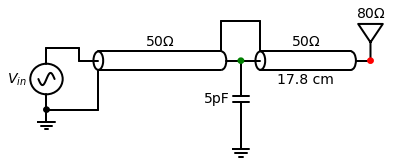

In [23]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$50\Omega$'))
d.add(elm.Dot,color='g')
d.add(elm.Capacitor(l=2.5,d='down', label='5pF'))
d.add(elm.Ground())
coax2=d.add(elm.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$50\Omega$', botlabel='17.8 cm'))
d.add(elm.Dot,color='r')
d.add(elm.Antenna( label='$80\Omega$'))
d.add(elm.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(elm.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 4: Bijplaatsen van een spoel in parallel

We plaatsen $\frac{Z_L}{Z_0}=\frac{1}{1.6}$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

###### Smith kaart van de vierde oplossing.

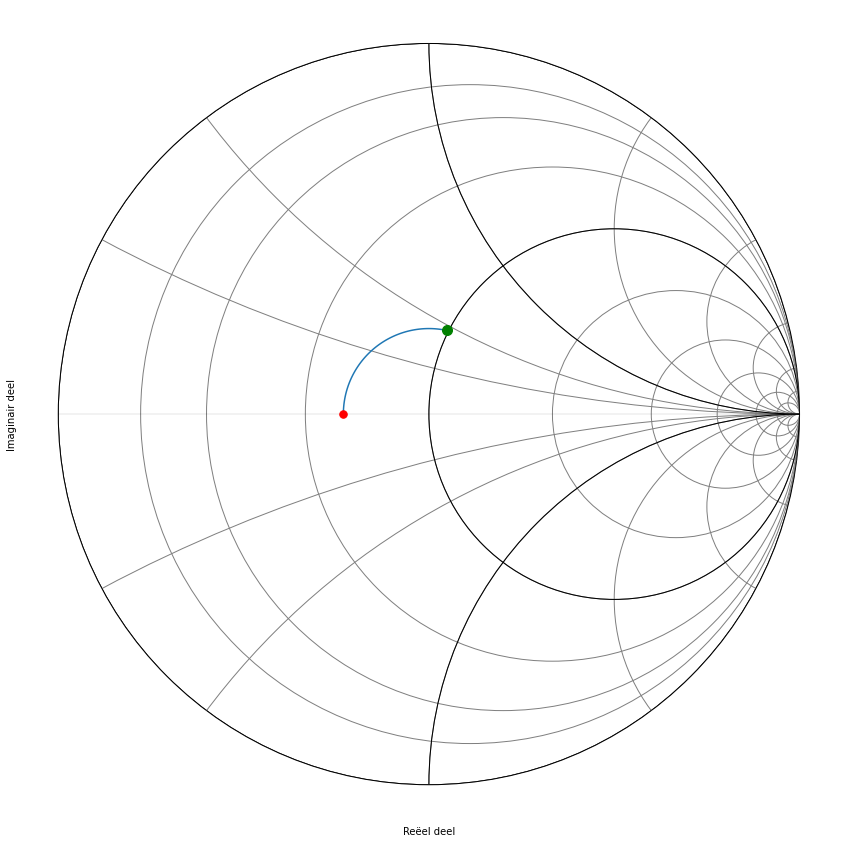

In [24]:
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,103)]
smitplot(ylijn,Y_0)

In [25]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(100,105)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 100    Y= 19.46+9.34j mS     lengte=6.94 cm
 101    Y= 19.62+9.39j mS     lengte=7.01 cm
 102    Y= 19.78+9.43j mS     lengte=7.08 cm
 103    Y= 19.94+9.47j mS     lengte=7.15 cm
 104    Y= 20.11+9.51j mS     lengte=7.22 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

$$ \frac{1}{j \omega L}= - 0.00947 j $$

$$ L =\frac{1}{0.00947\cdot  2 \pi \cdot 300 \times 10^6}= 56 nH $$

In [ ]:
1/0.00947/2/np.pi/3e8

<p class="alert alert-success">
De optimale inductantiewaarde in parallel wordt dus  56 nH  de nodige lengte van de coax tussen de antenne en de aanpassing is 7.2 cm 
</p>

Het schema dat we nodig hebben om deze vierde oplossing te realiseren wordt dus:

###### circuit van de vierde oplossing.

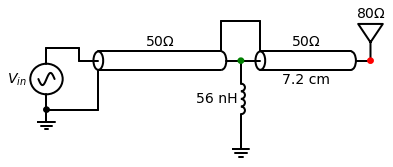

In [27]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$50\Omega$'))
d.add(elm.Dot,color='g')
d.add(elm.Inductor(l=2.5,d='down', label='56 nH'))
d.add(elm.Ground())
coax2=d.add(elm.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$50\Omega$', botlabel='7.2 cm'))
d.add(elm.Dot,color='r')
d.add(elm.Antenna( label='$80\Omega$'))
d.add(elm.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(elm.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 5: Oplossing 3 waarbij de condensator vervangen is door een open transmissielijn

De y = 1 - j 0.47 compenseren we door +j 0.47 vertrekkende vanuit g=0.

###### Smith kaart van de vijfde oplossing.

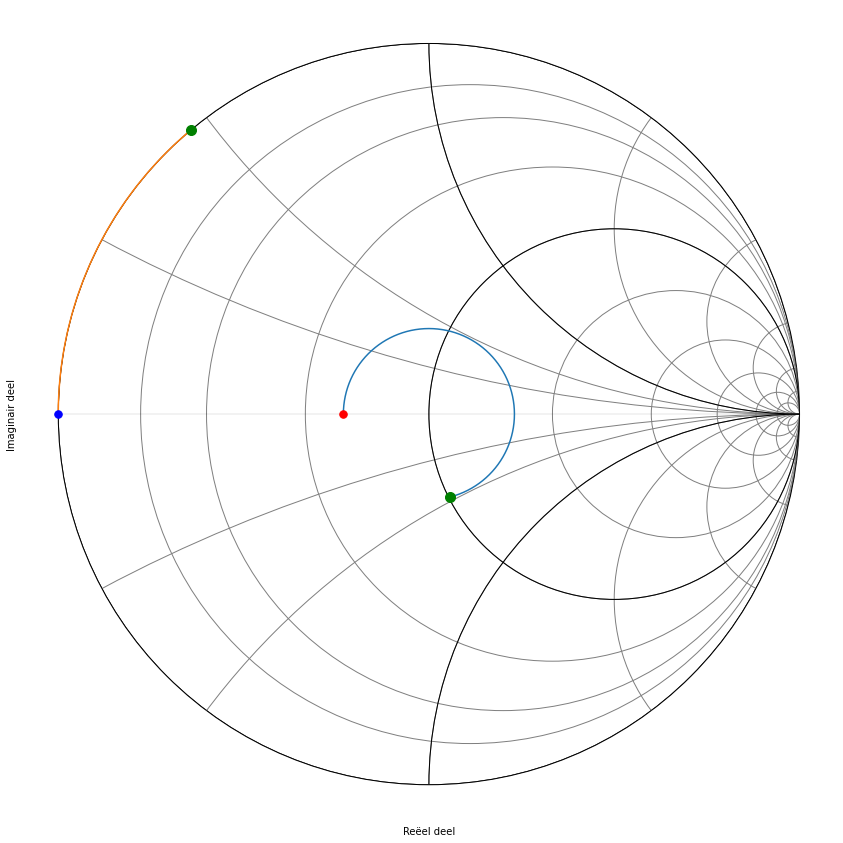

In [35]:
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,257)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,51)]

def smitplot2(ylijn,yopenlijn,Y_0):
    gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
    gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([g.real for g in gammaopen],[g.imag for g in gammaopen])
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
    ax.plot([gammaopen[-1].real],[gammaopen[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gammaopen[0].real],[gammaopen[0].imag],color='blue', marker=".", markersize=15)
smitplot2(ylijn,yopenlijn,Y_0)

In [29]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(255,260)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 255    Y= 20.28-9.55j mS     lengte=17.71 cm
 256    Y= 20.11-9.51j mS     lengte=17.78 cm
 257    Y= 19.94-9.47j mS     lengte=17.85 cm
 258    Y= 19.78-9.43j mS     lengte=17.92 cm
 259    Y= 19.62-9.39j mS     lengte=17.99 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [33]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(50,55)]

def ylijnprint2(ylijn,golflengte=50):
    print('hoek    admitantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}       Y= {:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.imag*1000, i/360*golflengte/2))

ylijnprint2(yopenlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
  50       Y= +9.33j mS     lengte=3.47 cm
  51       Y= +9.54j mS     lengte=3.54 cm
  52       Y= +9.75j mS     lengte=3.61 cm
  53       Y= +9.97j mS     lengte=3.68 cm
  54       Y= +10.19j mS     lengte=3.75 cm


<p class=tabcaption> Overzicht van de bekomen admitantie van de open transmissielijn als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

Hieruit blijkt dat een open transmissielijn met de lengte van $\frac{51}{360} \frac{\lambda}{2}$ de beste aanpassing geeft.

<p class="alert alert-success">
Het stukje open coax dat we moeten voorzien ter vervanging van de condensator is dus: 3.54 cm
</p>

Het schema dat we nodig hebben om deze vijfde oplossing te realiseren wordt dus:

###### circuit van de vijfde oplossing.

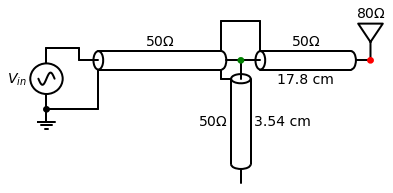

In [36]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$50\Omega$'))
d.add(elm.Dot,color='g')
coax3=d.add(elm.coax(xy=coax1.end,d='down',l=1.5,length=4, label='$50\Omega$', botlabel='3.54 cm'))
d.add(elm.Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(elm.Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(elm.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$50\Omega$', botlabel='17.8 cm'))
d.add(elm.Dot,color='r')
d.add(elm.Antenna( label='$80\Omega$'))
d.add(elm.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(elm.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 6: Oplossing 3 waarbij de condensator vervangen is door een kortgesloten transmissielijn

De y = 1 - j 0.47 compenseren we door +j 0.47 vertrekkende vanuit g=$\infty$

###### Smith kaart van de zesde oplossing.

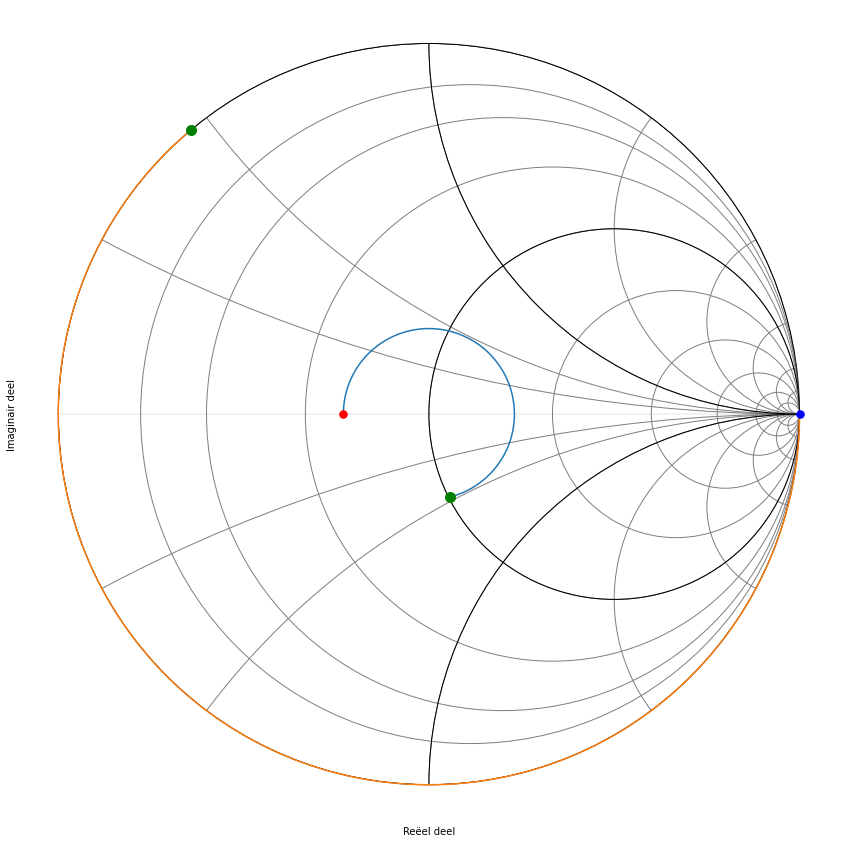

In [37]:
ykortlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(-180,51)]

smitplot2(ylijn,ykortlijn,Y_0)

In [40]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(255,260)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 255    Y= 20.28-9.55j mS     lengte=17.71 cm
 256    Y= 20.11-9.51j mS     lengte=17.78 cm
 257    Y= 19.94-9.47j mS     lengte=17.85 cm
 258    Y= 19.78-9.43j mS     lengte=17.92 cm
 259    Y= 19.62-9.39j mS     lengte=17.99 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [39]:
ykortlijn=[(i+180,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(50,55)]
ylijnprint2(ykortlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 230       Y= +9.33j mS     lengte=15.97 cm
 231       Y= +9.54j mS     lengte=16.04 cm
 232       Y= +9.75j mS     lengte=16.11 cm
 233       Y= +9.97j mS     lengte=16.18 cm
 234       Y= +10.19j mS     lengte=16.25 cm


<p class=tabcaption> Overzicht van de bekomen admitantie van de kortgesloten transmissielijn als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
Het stukje kortgesloten coax dat we moeten voorzien ter vervanging van de condensator is dus: 16 cm
</p>

Het schema dat we nodig hebben om deze zesde oplossing te realiseren wordt dus:

###### circuit van de zesde oplossing.

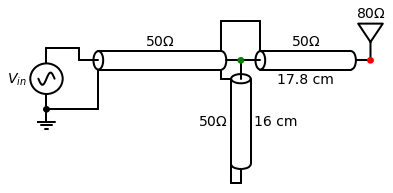

In [41]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$50\Omega$'))
d.add(elm.Dot,color='g')
coax3=d.add(elm.coax(xy=coax1.end,d='down',l=1.5,length=4, label='$50\Omega$', botlabel='16 cm'))
d.add(elm.Line(tox=coax3.shieldend,d='left'))
d.add(elm.Line(toy=coax3.shieldend,d='up'))

d.add(elm.Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(elm.Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(elm.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$50\Omega$', botlabel='17.8 cm'))
d.add(elm.Dot,color='r')
d.add(elm.Antenna( label='$80\Omega$'))
d.add(elm.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(elm.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 7: Oplossing 4 waarbij het spoel vervangen is door een open transmissielijn

De y = 1 + j 0.47 compenseren we door -j 0.47 vertrekkende vanuit g=0.

###### Smith kaart van de zevende oplossing.

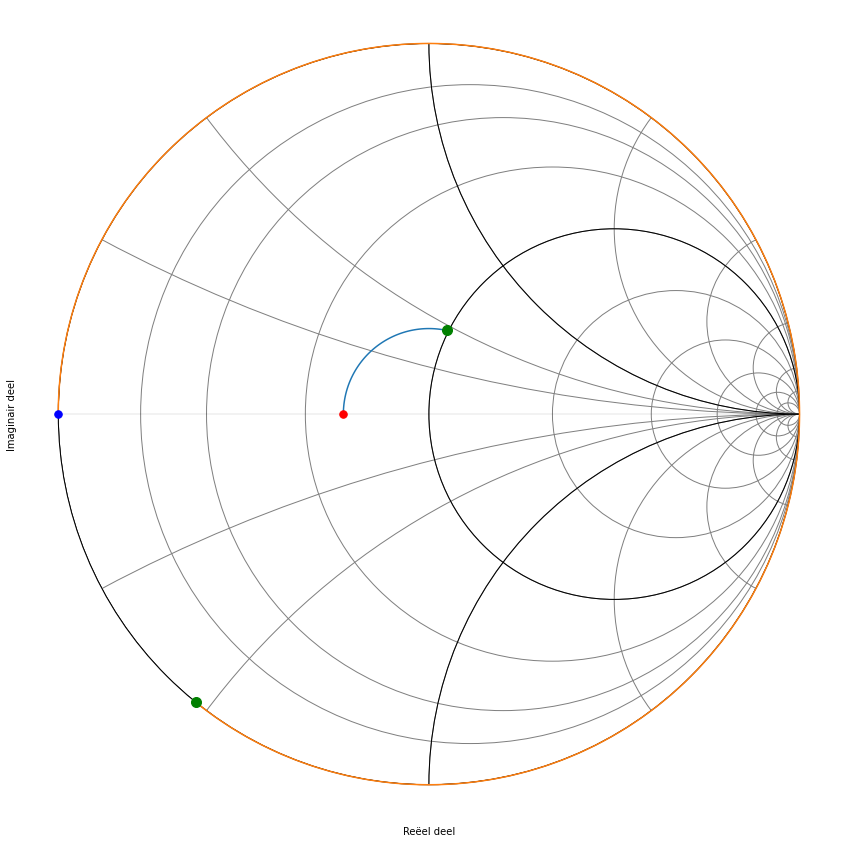

In [51]:
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,103)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,310)]
smitplot2(ylijn,yopenlijn,Y_0)

In [43]:

ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(100,105)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 100    Y= 19.46+9.34j mS     lengte=6.94 cm
 101    Y= 19.62+9.39j mS     lengte=7.01 cm
 102    Y= 19.78+9.43j mS     lengte=7.08 cm
 103    Y= 19.94+9.47j mS     lengte=7.15 cm
 104    Y= 20.11+9.51j mS     lengte=7.22 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [49]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(305,311)]
ylijnprint2(yopenlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 305       Y= -10.41j mS     lengte=21.18 cm
 306       Y= -10.19j mS     lengte=21.25 cm
 307       Y= -9.97j mS     lengte=21.32 cm
 308       Y= -9.75j mS     lengte=21.39 cm
 309       Y= -9.54j mS     lengte=21.46 cm
 310       Y= -9.33j mS     lengte=21.53 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
Het stukje open coax dat we moeten voorzien ter vervanging van het spoel is dus: 21.46 cm
</p>

Het schema dat we nodig hebben om deze zevende oplossing te realiseren wordt dus:

###### circuit van de zevende oplossing.

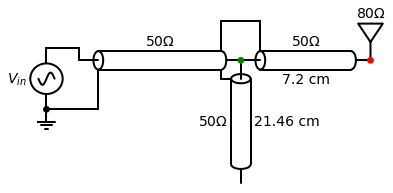

In [50]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$50\Omega$'))
d.add(elm.Dot,color='g')
coax3=d.add(elm.coax(xy=coax1.end,d='down',l=1.5,length=4, label='$50\Omega$', botlabel='21.46 cm'))
d.add(elm.Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(elm.Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(elm.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$50\Omega$', botlabel='7.2 cm'))
d.add(elm.Dot,color='r')
d.add(elm.Antenna( label='$80\Omega$'))
d.add(elm.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(elm.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 8: Oplossing 4 waarbij het spoel vervangen is door een kortgesloten transmissielijn


De y = 1 + j 0.47 compenseren we door -j 0.47 vertrekkende vanuit g=$\infty$. 

###### Smith kaart van de achtste oplossing.

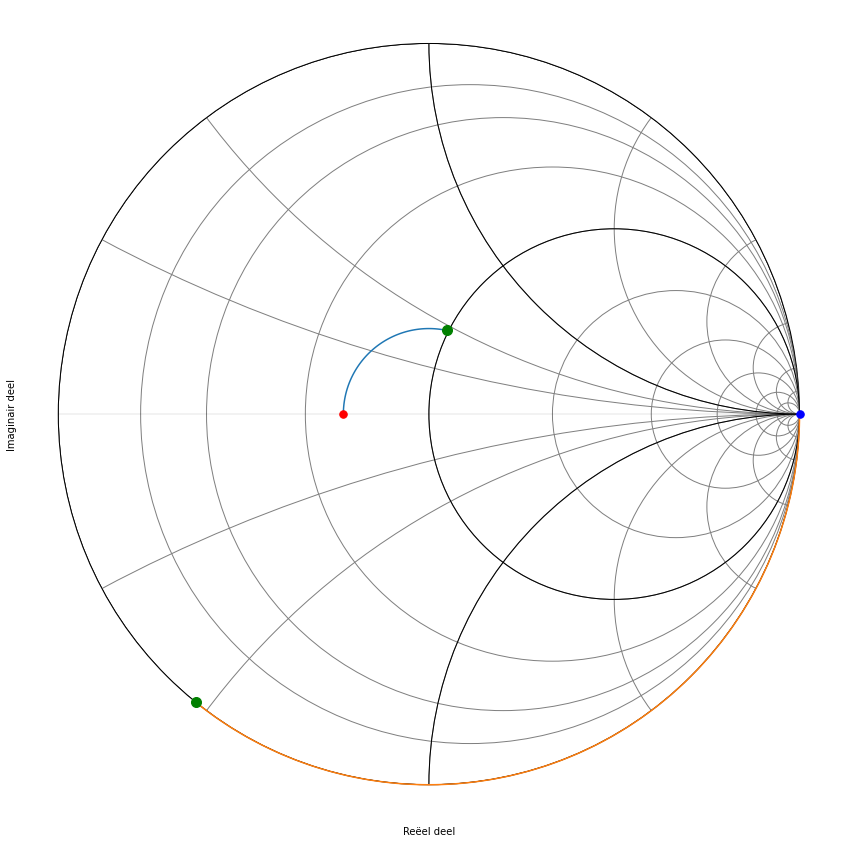

In [52]:
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,103)]
ykortlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(180,310)]
smitplot2(ylijn,ykortlijn,Y_0)

In [53]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(100,106)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 100    Y= 19.46+9.34j mS     lengte=6.94 cm
 101    Y= 19.62+9.39j mS     lengte=7.01 cm
 102    Y= 19.78+9.43j mS     lengte=7.08 cm
 103    Y= 19.94+9.47j mS     lengte=7.15 cm
 104    Y= 20.11+9.51j mS     lengte=7.22 cm
 105    Y= 20.28+9.55j mS     lengte=7.29 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [57]:
ykortlijn=[(i-180,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(305,311)]
ylijnprint2(ykortlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 125       Y= -10.41j mS     lengte=8.68 cm
 126       Y= -10.19j mS     lengte=8.75 cm
 127       Y= -9.97j mS     lengte=8.82 cm
 128       Y= -9.75j mS     lengte=8.89 cm
 129       Y= -9.54j mS     lengte=8.96 cm
 130       Y= -9.33j mS     lengte=9.03 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
Het stukje kortgesloten coax dat we moeten voorzien ter vervanging van het spoel is dus: 9 cm
</p>

Het schema dat we nodig hebben om deze achtste oplossing te realiseren wordt dus:

###### circuit van de achtste oplossing.

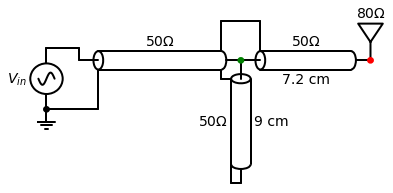

In [58]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$50\Omega$'))
d.add(elm.Dot,color='g')
coax3=d.add(elm.coax(xy=coax1.end,d='down',l=1.5,length=4, label='$50\Omega$', botlabel='9 cm'))
d.add(elm.Line(tox=coax3.shieldend,d='left'))
d.add(elm.Line(toy=coax3.shieldend,d='up'))

d.add(elm.Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(elm.Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(elm.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$50\Omega$', botlabel='7.2 cm'))
d.add(elm.Dot,color='r')
d.add(elm.Antenna( label='$80\Omega$'))
d.add(elm.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(elm.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()